In [159]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('train.csv')
data.shape

(891, 12)

In [160]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [162]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [163]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

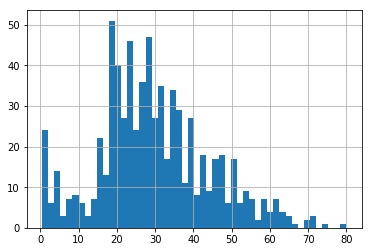

In [164]:
data.Age.hist(bins = 50);

In [165]:
data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [166]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

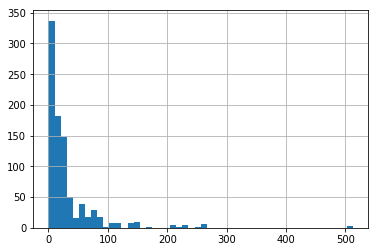

In [167]:
data.Fare.hist(bins = 50);

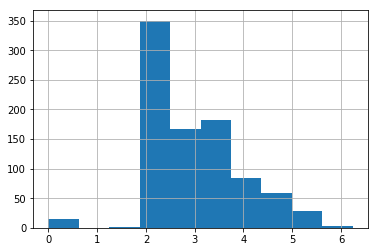

In [169]:
data['log_Fare'] = np.log(data.Fare + 1)
data.log_Fare.hist();

In [170]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,log_Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


In [171]:
data.Age.skew()

0.38910778230082704

In [172]:
print('Коэф. эксцесса: {}  коэф. ассиметрии: {}    медиана: {}'.format(data.Age.kurtosis(), data.Age.skew(), data.Age.mode()))

Коэф. эксцесса: 0.17827415364210353  коэф. ассиметрии: 0.38910778230082704    медиана: 0    24.0
dtype: float64


In [173]:
print('Коэф. эксцесса: {}  коэф. ассиметрии: {}    медиана: {}'.format(data.Fare.kurtosis(), data.Fare.skew(), data.Fare.mode()))

Коэф. эксцесса: 33.39814088089868  коэф. ассиметрии: 4.787316519674893    медиана: 0    8.05
dtype: float64


In [178]:
print('Коэф. эксцесса: {}  коэф. ассиметрии: {}    медиана: {}'.format(data.log_Fare.kurtosis(), data.log_Fare.skew(), data.log_Fare.mode()))

Коэф. эксцесса: 0.976142106683104  коэф. ассиметрии: 0.3949280095189306    медиана: 0    2.202765
dtype: float64


In [145]:
train_idx = np.random.choice(data.index, size = int(len(data.index) * 0.75), replace = False)
train = data.loc[train_idx]
test = data.loc[set(data.index) - set(train_idx)]
train.shape, test.shape

((668, 13), (223, 13))

Из коэф ассиметрии и эксцесса видно, что у признака Fare  ф/я распр имеет острый пик и не симметрична, что видно из гистограммы. Тк для Age значния ассиметрии близки к 0. Также рассмотрим log(Fare + 1)

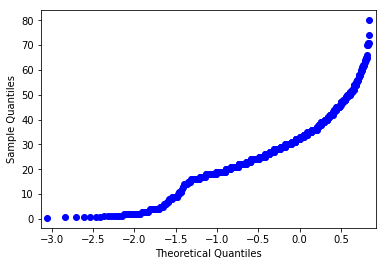

In [179]:
sm.qqplot(data.Age);

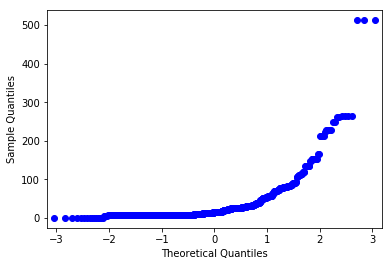

In [181]:
sm.qqplot(data.Fare);

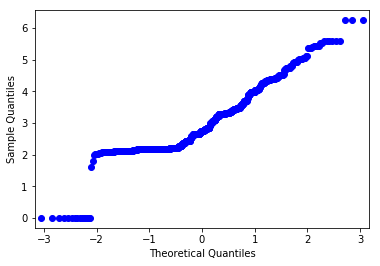

In [184]:
sm.qqplot(data.log_Fare);

$H_0$: выборка из нормального распр
$H_1$: выборка не из нормального распределения

In [147]:
stats.shapiro(data.Age), stats.normaltest(data.Age)

((nan, 1.0), NormaltestResult(statistic=nan, pvalue=nan))

#для признака Fare проверим сначала "слабый критерий"
$H_0$: S=0 K=3 $H_1$: $S!=0 H!=3$

In [156]:
stats.jarque_bera(data.Fare)

(44323.16153155755, 0.0)

проверим экспоненту log(Fare + 1)

In [175]:
stats.jarque_bera(data.log_Fare)

(57.57959471216518, 3.1386004906153175e-13)

In [150]:
train.to_excel('excel.xlsx')

In [152]:
train_excel = pd.read_excel('excel.xlsx')

In [154]:
train_excel.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,exp_Fare
635,636,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,NaN,S,1.2026e+06
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C,5.14842e+06
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C,8584111951512385617920
764,765,0,3,"Eklund, Mr. Hans Linus",male,16.0,0,0,347074,7.7750,NaN,S,6470.44
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q,6310.69


In [ ]:
.